In [166]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [167]:
X = iris.data
y = iris.target

###### Import relevant class


In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

print(knn.predict([5, 6, 5, 6]))

# Tuning

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

print(knn.predict([5, 1, 0, 6]))

[2]
[1]


/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


#### Using a different clasification model

In [170]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X, y)

print(logreg.predict([5, 1, 0, 6]))

[2]


/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [171]:
y_predicted = logreg.predict(X)

from sklearn import metrics

print(metrics.accuracy_score(y, y_predicted))

0.96


Do the same with K neighbor classifier

In [172]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
y_predicted = knn.predict(X)
print(metrics.accuracy_score(y, y_predicted))

0.986666666667


Find accuracy using test/split technique

In [173]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [174]:
y_predicted = logreg.predict(x_test)

print(metrics.accuracy_score(y_test, y_predicted))

0.966666666667


Try the same using KNN


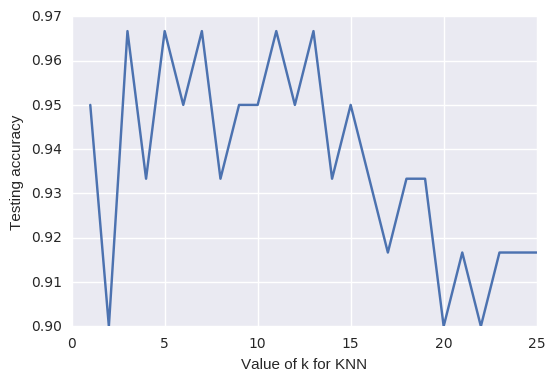

In [175]:
k_range = range(1, 26)
scores = []
for k_value in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(x_train, y_train)
    y_predicted = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predicted))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

### Let's try regression problem

In [176]:
import pandas as pd

In [177]:
data = pd.read_csv('http://bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [178]:
import seaborn as sns
%matplotlib inline

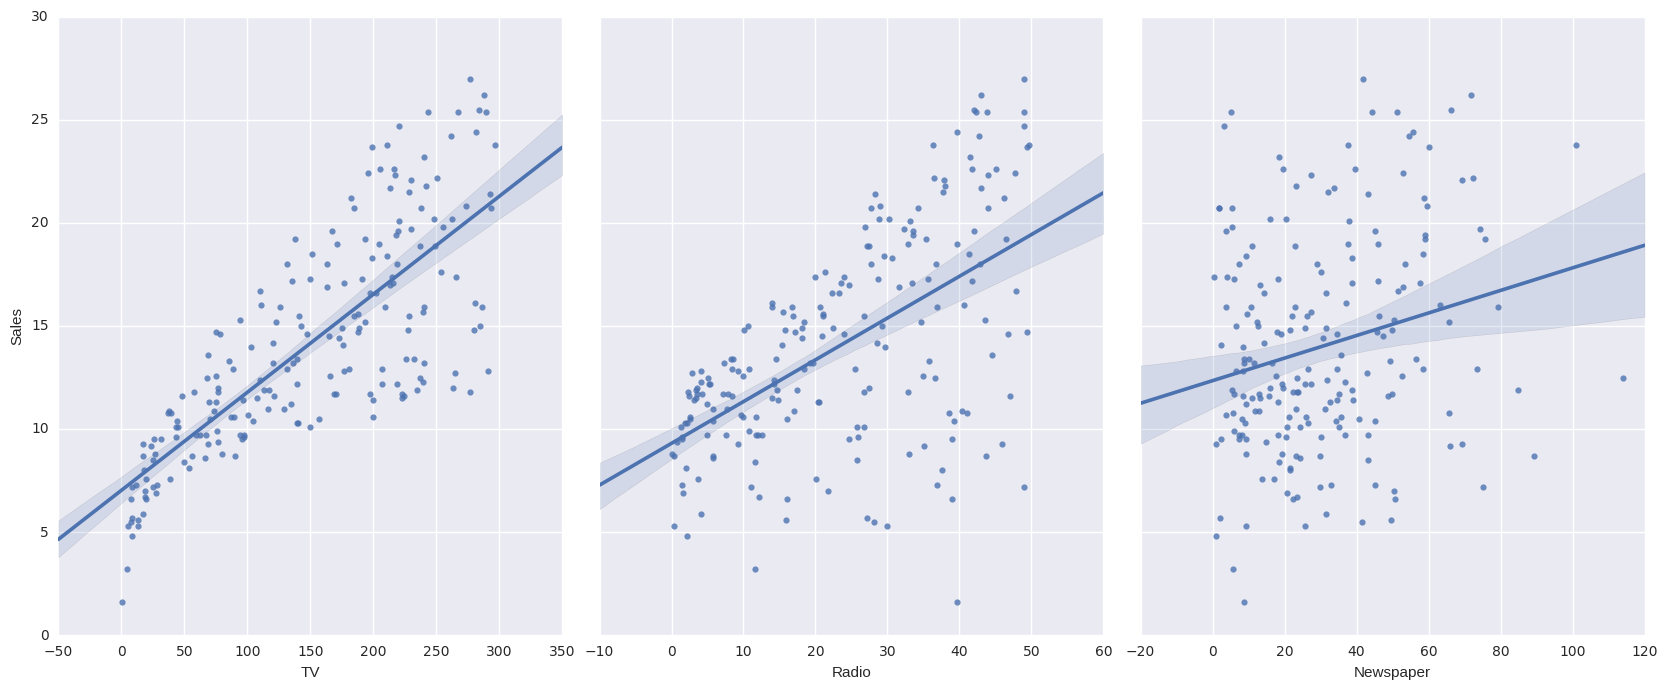

In [179]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], size=7, aspect=0.8, kind='reg')

In [180]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()

y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Use linear regression

In [181]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [182]:
y_predicted = linreg.predict(x_test)

Find Root Mean Square Error value

In [183]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.40465142303


###### Train model without `Newspaper` feature, to acheive more accuracy

In [184]:
X = X.drop('Newspaper', 1)
X.head()
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_predicted = linreg.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.38790346994


Testing accuracy is a high variance estimate, means it changes of each different set of same data set. To overcome we should estimate a model with k-fold cross validation. Scikit learn has function to do k-fold validation, try the same against Iris dataset

In [185]:
from sklearn.cross_validation import cross_val_score

X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.966666666667


[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656]


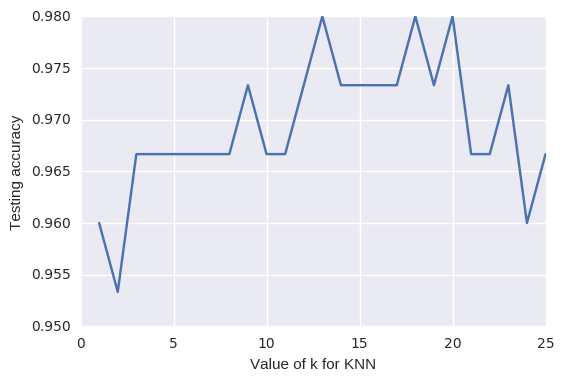

In [186]:
# Find optimal K value
k_range = range(1, 26)
scores = []
for k_value in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_value)    
    scores.append(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print(scores)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

In [187]:
# Choose 18 as optimal K value

knn = KNeighborsClassifier(n_neighbors=18)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.98


In [188]:
# What if I try the same with logistic regression

logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


For this dataset K neighbor classifier model is better than logistic regression

#### Feature selection using cross validation

In [189]:
lr = LinearRegression()

feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data['Sales']
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='mean_squared_error')).mean())


1.69135317081


In [190]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data['Sales']
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='mean_squared_error')).mean())

1.67967484191


### More efficient tuning using GridSearchCV

In [191]:
from sklearn.grid_search import GridSearchCV

param_grid = dict(n_neighbors=list(range(1,26)))
knn = KNeighborsClassifier()
# Instantiate grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
# Type of this coulmn should not have changed, But I am getting error if it if float64, Soon I will check this
y = data['Sales'].astype(int)
grid.fit(X, y)
grid.grid_scores_

/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


[mean: 0.27000, std: 0.14183, params: {'n_neighbors': 1},
 mean: 0.21000, std: 0.13511, params: {'n_neighbors': 2},
 mean: 0.17000, std: 0.13629, params: {'n_neighbors': 3},
 mean: 0.16000, std: 0.13911, params: {'n_neighbors': 4},
 mean: 0.18000, std: 0.13224, params: {'n_neighbors': 5},
 mean: 0.17000, std: 0.12004, params: {'n_neighbors': 6},
 mean: 0.18500, std: 0.13398, params: {'n_neighbors': 7},
 mean: 0.17500, std: 0.10924, params: {'n_neighbors': 8},
 mean: 0.17000, std: 0.08866, params: {'n_neighbors': 9},
 mean: 0.14500, std: 0.10135, params: {'n_neighbors': 10},
 mean: 0.14000, std: 0.14337, params: {'n_neighbors': 11},
 mean: 0.15500, std: 0.14207, params: {'n_neighbors': 12},
 mean: 0.18000, std: 0.09725, params: {'n_neighbors': 13},
 mean: 0.18500, std: 0.08705, params: {'n_neighbors': 14},
 mean: 0.18500, std: 0.08062, params: {'n_neighbors': 15},
 mean: 0.19000, std: 0.10170, params: {'n_neighbors': 16},
 mean: 0.18500, std: 0.09962, params: {'n_neighbors': 17},
 mean:

mean: 0.27000, std: 0.14183, params: {'n_neighbors': 1}
{'n_neighbors': 1}
[ 0.12121212  0.35714286  0.22222222  0.32        0.19047619  0.31578947
  0.1875      0.23076923  0.6         0.5       ]
0.27


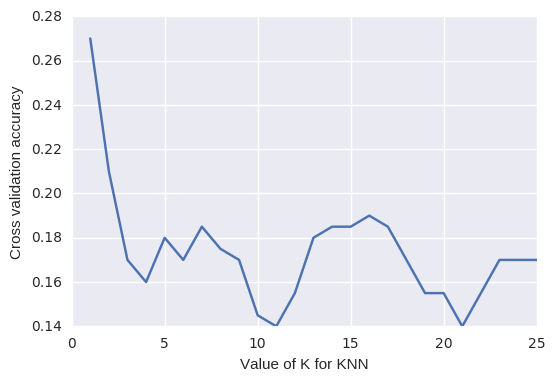

In [192]:
print(grid.grid_scores_[0])
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

grid_mean_scores = [res.mean_validation_score for res in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validation accuracy')

^ Since I have change data type, accuracy has been reduced

In [193]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.27
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [194]:
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=list(range(1,30)), weights=weight_options)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid.fit(X, y)
grid.grid_scores_

/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


[mean: 0.27000, std: 0.14183, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.27000, std: 0.14183, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.21000, std: 0.13511, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.27000, std: 0.14183, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.17000, std: 0.13629, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.27500, std: 0.15517, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.16000, std: 0.13911, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.27000, std: 0.18012, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.18000, std: 0.13224, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.26000, std: 0.19194, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.17000, std: 0.12004, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.24500, std: 0.17073, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.18500, std: 0.13398, para

In [195]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.275
{'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')


GridSearchCV becomes computational infeasible if we do it against a complex model with multiple parameters. To overcome this limitaion we have RandomizedSearcCV which performs random combination of given parameter, we can even give the number of iteration which means we can control how long RandomizedSearchCV should run.

In [196]:
from sklearn.grid_search import RandomizedSearchCV

param_dist = dict(n_neighbors=list(range(1,30)), weights=weight_options)

rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_jobs=-1, n_iter=50, random_state=5)

rand.fit(X, y)
rand.best_score_

/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.27500000000000002

In [197]:
best_scores = []

for _ in range(1, 20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_jobs=-1, n_iter=50, random_state=5)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)
    

/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The m

[0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002, 0.27500000000000002]


### Classification Acccuracy

In [198]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [199]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label


In [200]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [201]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_predicted_class = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_predicted_class))

0.692708333333


In [202]:
print(y_test.value_counts())
print('Null accuracy of this dataset is ', max(y_test.mean(), 1 - y_test.mean()))

0    130
1     62
Name: label, dtype: int64
Null accuracy of this dataset is  0.6770833333333333


We can't be happy with 69% percent accuracy in dataset which has 67% of null accuaracy. There may be many FalseNegatives in prediction.

### Confusion Matrix

In [203]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_class)
print(confusion_matrix)

[[118  12]
 [ 47  15]]


#### Adjusting classification threshold

In [204]:
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [205]:
logreg.predict_proba(x_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

The default classification threshold is 0.5, you could verify the the same in above two outputs. The places in second column with probability greater  than 0.5 is predicted as Positive

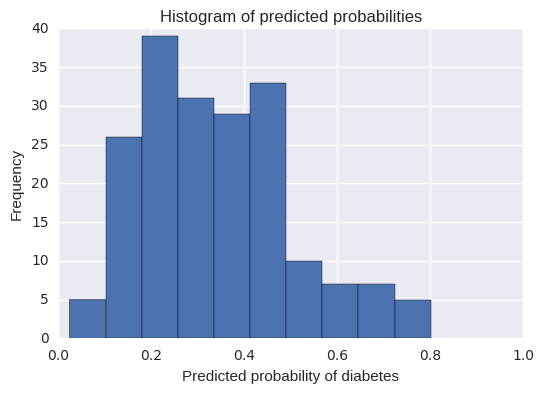

In [206]:
# Draw a hist of above probability to get more clear picture
y_predicted_prob = logreg.predict_proba(x_test)[:, 1]
#plt.rcParams['font.size'] = 14
plt.hist(y_predicted_prob)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

The plot shows that 35% of positive predicted in a range between 0.4 and 0.5. So let's reduce the threshold to 0.4

In [207]:
from sklearn.preprocessing import binarize
y_predicted_class_04 = binarize(y_predicted_prob, 0.3)[0]
new_confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_class_04)
new_confusion_matrix

/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[80, 50],
       [16, 46]])

In [208]:
# Old confusion matrix
print(confusion_matrix)

[[118  12]
 [ 47  15]]


Previously we had only 15 TruePsoitive now Its been increased to 46